In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [95]:
x,y = make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

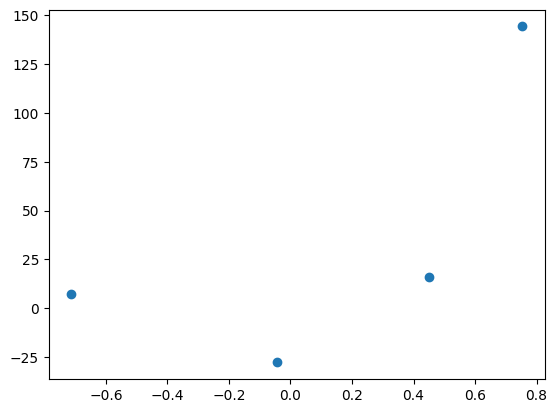

In [96]:
plt.scatter(x,y)

In [97]:
lr = LinearRegression()

In [98]:
lr.fit(x,y)


LinearRegression()

In [99]:
lr.coef_

array([78.35063668])

In [100]:
lr.intercept_

26.15963284313262

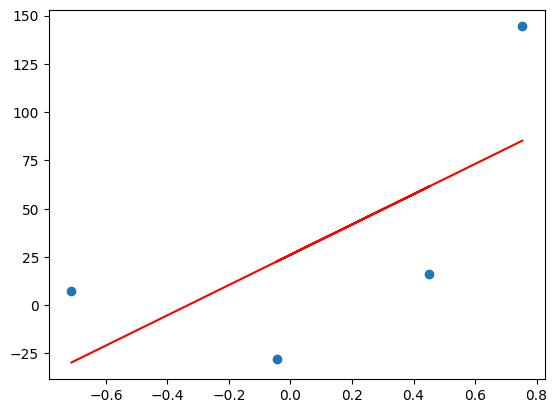

In [101]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')

# Gradient Descent

In [102]:
# let apply gadient descent assuming slope is constant m= 78.35
# and lets assume the starting value for intercept b = 0
y_pred = ((78.26*x)+0).reshape(4)

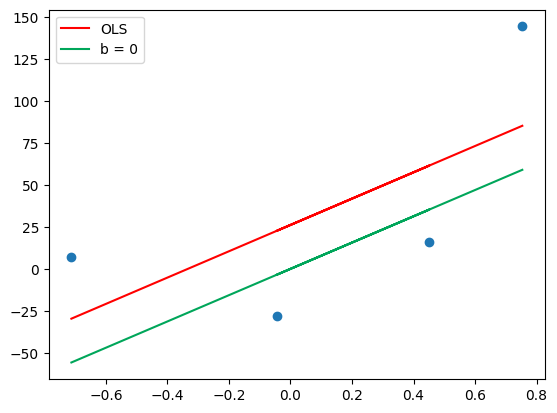

In [103]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='#00a65a',label='b = 0')
plt.legend()
plt.show()

In [104]:
m = 78.26
b = 0

loss_slope = -2 *np.sum(y-m*x.ravel() -b)
loss_slope


-209.35839737795519

In [105]:
lrate = 0.1
step_size = loss_slope*lrate
step_size

-20.93583973779552

In [106]:
b = b - step_size
b

20.93583973779552

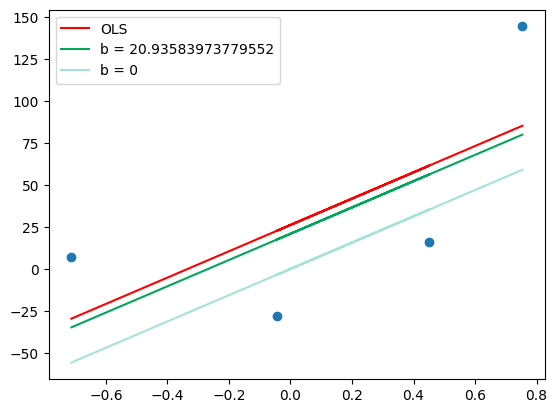

In [107]:
y_pred1 = ((78.26 * x)+ b).reshape(4)
plt.scatter(x,y)
plt.plot(x,lr.predict(x) , color='red',label = 'OLS')
plt.plot(x,y_pred1,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()


In [108]:
# iteration 2
loss_slope = -2 * np.sum(y-m*x.ravel() -b)
loss_slope


-41.87167947559104

In [109]:
step_size = step_size*lrate
step_size

-2.093583973779552

In [110]:
b = b-step_size
b

23.02942371157507

In [111]:
y_pred2 = ((78.35 * x) + b).reshape(4)
y_pred2

array([-32.78638466,  58.42892045,  19.54260752,  82.08701948])

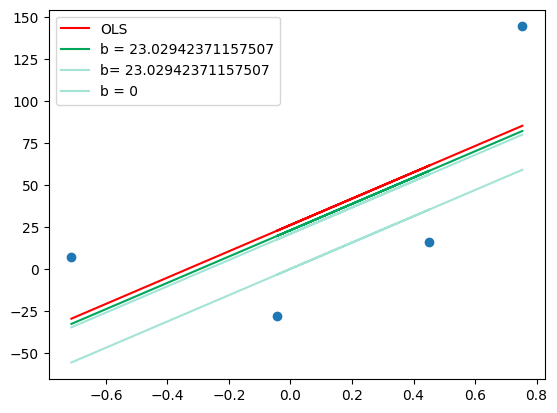

In [112]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred2,color='#00a65a',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='#A3E4D7',label='b= {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

In [113]:
loss_slope = -2 * np.sum(y - m*x.ravel()-b)
loss_slope

-25.123007685354622

In [114]:
step_size = loss_slope*lrate
step_size

-2.5123007685354626

In [115]:
b = b -step_size
b

25.54172448011053

In [116]:
y_pred3 = ((78.35*x)+b).reshape(4)
y_pred3

array([-30.27408389,  60.94122122,  22.05490829,  84.59932025])

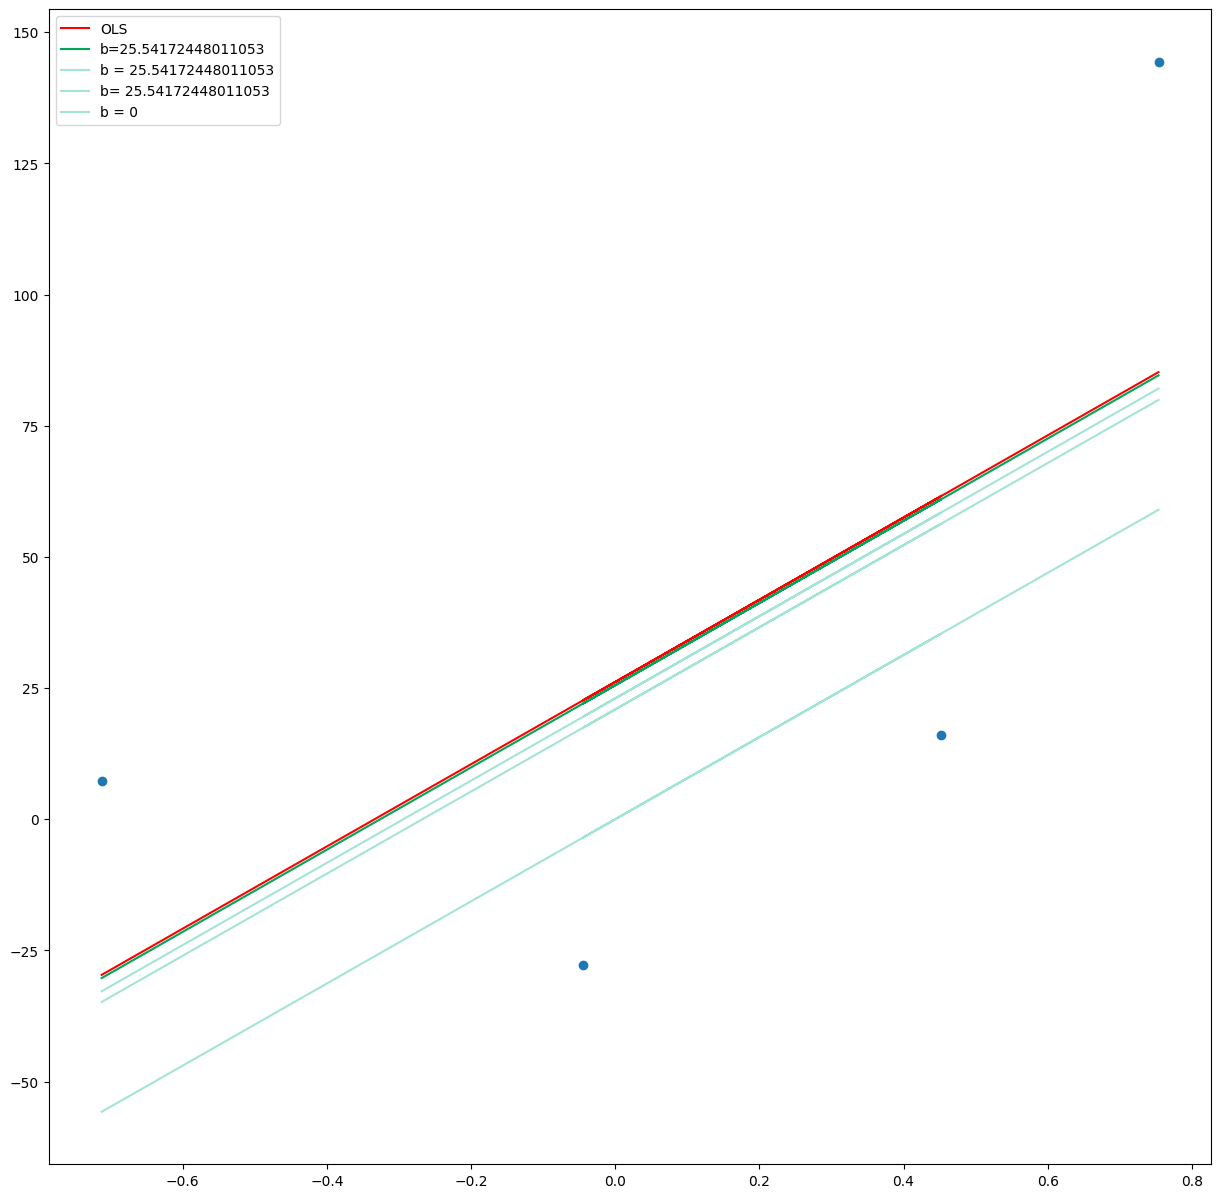

In [117]:
plt.figure(figsize=(15,15))
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred3,color='#00a65a',label='b={}'.format(b))
plt.plot(x,y_pred2,color='#A3E4D7',label='b = {}'.format(b))
plt.plot(x,y_pred1,color='#A3E4D7',label='b= {}'.format(b))
plt.plot(x,y_pred,color='#A3E4D7',label='b = 0')
plt.legend()
plt.show()

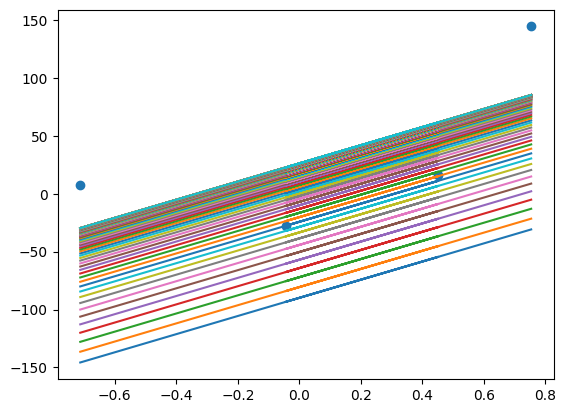

In [120]:
b = -100
m = 78.35
lrate = 0.01
epoches = 100
for i in range(epoches):
    loss_slope = -2*np.sum(y-m*x.ravel()-b)
    step_size = loss_slope*lrate
    b = b - step_size
    y_pred = m*x+b
    plt.plot(x,y_pred)
plt.scatter(x,y)

# apni class of GDRegressor

In [162]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [154]:
x,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [155]:
lr = LinearRegression()

In [156]:
lr.fit(x,y)

LinearRegression()

In [157]:
lr.coef_

array([27.82809103])

In [158]:
lr.intercept_

-2.29474455867698

In [164]:
np.mean(cross_val_score(lr,x,y,scoring='r2',cv=10))

0.6375011587464419

In [160]:
m = 27.82
b =-2.294

In [173]:
class GDRegressor:
    def __init__(self,lr,epoches):
        self.m = 100
        self.b = -120
        self.lr = lr
        self.epoches =epoches

    def fit(self,x,y):
        for i in range(self.epoches):
            loss_slope_b = -2 * np.sum(y - self.m*x.ravel()-self.b)
            self.b = self.b - (loss_slope_b*self.lr)
            loss_slope_m= -2 * np.sum((y - self.m*x.ravel()-self.b)*x.ravel())
            self.m = self.m -(loss_slope_m*self.lr)
        print(self.m,self.b)



In [185]:
mera_gd = GDRegressor(0.001,50)

In [186]:
mera_gd.fit(x,y)

27.836278851057656 -2.2989985148180527
